In [1]:
######## Image Object Detection Using Tensorflow-trained Classifier #########
#
# Author: Evan Juras
# Date: 1/15/18
# Description: 
# This program uses a TensorFlow-trained neural network to perform object detection.
# It loads the classifier and uses it to perform object detection on an image.
# It draws boxes, scores, and labels around the objects of interest in the image.

## Some of the code is copied from Google's example at
## https://github.com/tensorflow/models/blob/master/research/object_detection/object_detection_tutorial.ipynb

## and some is copied from Dat Tran's example at
## https://github.com/datitran/object_detector_app/blob/master/object_detection_app.py

## but I changed it to make it more understandable to me.

# Import packages
import os
import cv2
import numpy as np
import tensorflow as tf
import sys
import matplotlib.pyplot as plt

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

# Import utilites
from utils import label_map_util
from utils import visualization_utils as vis_util


/home/user_dsi_vnc/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/user_dsi_vnc/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/user_dsi_vnc/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/user_dsi_vnc/anaconda3/lib/python3.6/site-packages/tensorf

In [3]:
# Name of the directory containing the object detection module we're using
MODEL_NAME = 'inference_graph'
IMAGE_NAME = 'frame_81.jpg'

# Grab path to current working directory
CWD_PATH = os.getcwd()

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH,'training','labelmap.pbtxt')

# Path to image
PATH_TO_IMAGE = os.path.join(CWD_PATH,IMAGE_NAME)

In [4]:
# Number of classes the object detector can identify
NUM_CLASSES = 2

In [5]:
# Load the label map.
# Label maps map indices to category names, so that when our convolution
# network predicts `5`, we know that this corresponds to `king`.
# Here we use internal utility functions, but anything that returns a
# dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [6]:
# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

In [7]:
# Define input and output tensors (i.e. data) for the object detection classifier

# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')


In [8]:
# Load image using OpenCV and
# expand image dimensions to have shape: [1, None, None, 3]
# i.e. a single-column array, where each item in the column has the pixel RGB value
image = cv2.imread(PATH_TO_IMAGE)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

In [9]:
# Perform the actual detection by running the model with the image as input
(boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})

In [10]:
# Draw the results of the detection (aka 'visulaize the results')
vis_util.visualize_boxes_and_labels_on_image_array(
    image,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=8,
    min_score_thresh=0.60)

array([[[242, 243, 239],
        [248, 249, 245],
        [244, 241, 237],
        ...,
        [244, 245, 243],
        [245, 246, 244],
        [246, 247, 245]],

       [[245, 246, 242],
        [231, 232, 228],
        [170, 167, 163],
        ...,
        [139, 140, 138],
        [139, 140, 138],
        [140, 141, 139]],

       [[248, 249, 245],
        [220, 221, 217],
        [106, 103,  99],
        ...,
        [ 26,  26,  26],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       ...,

       [[247, 249, 249],
        [220, 227, 224],
        [ 97, 114, 105],
        ...,
        [ 67, 115,  89],
        [ 67, 115,  89],
        [ 67, 115,  89]],

       [[225, 227, 227],
        [202, 209, 206],
        [ 89, 106,  97],
        ...,
        [ 59, 105,  82],
        [ 59, 105,  82],
        [ 59, 105,  82]],

       [[175, 177, 177],
        [161, 168, 165],
        [ 64,  81,  72],
        ...,
        [ 39,  85,  62],
        [ 39,  85,  62],
        [ 39,  85,  62]]

In [11]:
image.shape

(1080, 1920, 3)

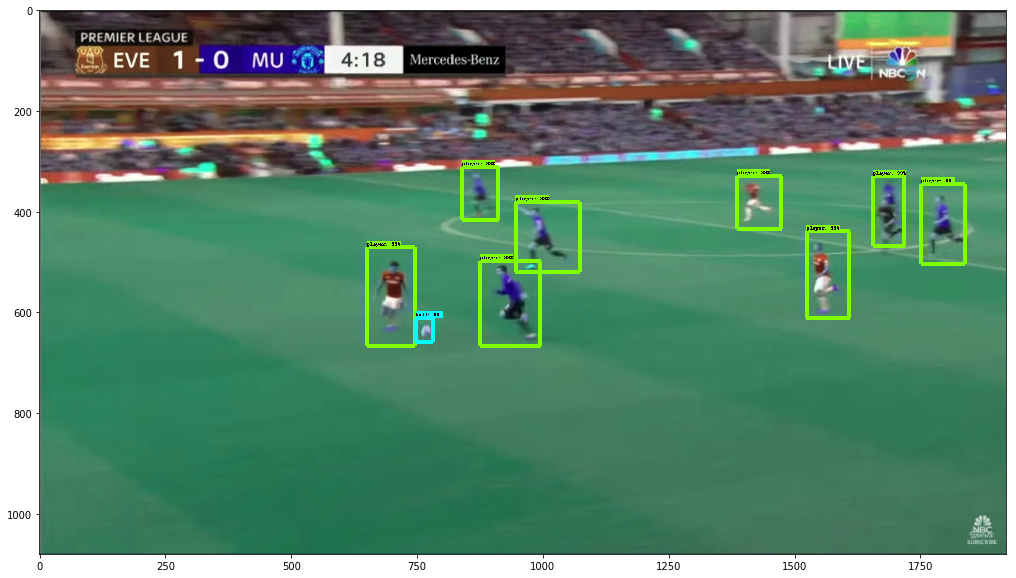

In [12]:
# All the results have been drawn on image. Now display the image.
plt.tight_layout
plt.figure(figsize=(20,10))
plt.imshow(image)

In [6]:
# Import packages
import os
import cv2
import numpy as np
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

# Import utilites
from utils import label_map_util
from utils import visualization_utils as vis_util

# Name of the directory containing the object detection module we're using
MODEL_NAME = 'inference_graph'
VIDEO_NAME = 'sample_soccer_video_for_ai.mp4'

# Grab path to current working directory
CWD_PATH = os.getcwd()

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH,'training','labelmap.pbtxt')

# Path to video
PATH_TO_VIDEO = os.path.join(CWD_PATH,VIDEO_NAME)

In [8]:
# Number of classes the object detector can identify
NUM_CLASSES = 2

# Load the label map.
# Label maps map indices to category names, so that when our convolution
# network predicts `5`, we know that this corresponds to `king`.
# Here we use internal utility functions, but anything that returns a
# dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

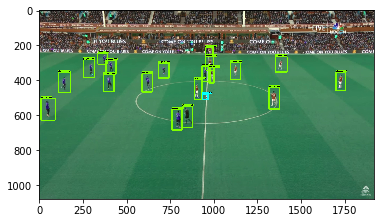

971


In [ ]:
# Define input and output tensors (i.e. data) for the object detection classifier

# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

# Open video file
video = cv2.VideoCapture(PATH_TO_VIDEO)

from IPython.display import clear_output
count = 0

while(video.isOpened()):

    # Acquire frame and expand frame dimensions to have shape: [1, None, None, 3]
    # i.e. a single-column array, where each item in the column has the pixel RGB value
    ret, frame = video.read()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame_expanded = np.expand_dims(frame_rgb, axis=0)

    # Perform the actual detection by running the model with the image as input
    (boxes, scores, classes, num) = sess.run(
        [detection_boxes, detection_scores, detection_classes, num_detections],
        feed_dict={image_tensor: frame_expanded})

    # Draw the results of the detection (aka 'visulaize the results')
    vis_util.visualize_boxes_and_labels_on_image_array(
        frame,
        np.squeeze(boxes),
        np.squeeze(classes).astype(np.int32),
        np.squeeze(scores),
        category_index,
        use_normalized_coordinates=True,
        line_thickness=8,
        min_score_thresh=0.60)

    # All the results have been drawn on the frame, so it's time to display it.
    count += 1
    print(count)
    clear_output(wait=True)
    plt.imshow(frame)
    plt.show()

#     # Press 'q' to quit
#     if cv2.waitKey(1) == ord('q'):
#         break
        


## Clustering on Color of pixel

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
img = cv2.imread('frame_17.jpg')

In [15]:
X = img
X = X/255 # Normalizing
X.shape

(1080, 1920, 3)

In [ ]:
from sklearn.cluster import k_means


## Finding Lines

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img = cv2.imread('frame_17.jpg')

# hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# # define range of white color in HSV
# # change it according to your need !
# lower_white = np.array([0,0,0], dtype=np.uint8)
# upper_white = np.array([0,0,255], dtype=np.uint8)

# # Threshold the HSV image to get only white colors
# mask = cv2.inRange(hsv, lower_white, upper_white)
# # Bitwise-AND mask and original image
# res = cv2.bitwise_and(img, img, mask= mask)

# plt.imshow(res)

# import sys
# sys.exit()


gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)
print(lines)
points = []
for line in lines:
    for x1, y1, x2, y2 in line:
        points.append(((x1 + 0.0, y1 + 0.0), (x2 + 0.0, y2 + 0.0)))
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)

lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)
print(lines_edges.shape)
#cv2.imwrite('line_parking.png', lines_edges)

print(points)
# intersections = bot.isect_segments(points)
# print(intersections)

# for inter in intersections:
#     a, b = inter
#     for i in range(3):
#         for j in range(3):
#             lines_edges[int(b) + i, int(a) + j] = [0, 255, 0]

cv2.imwrite('frame_22_e.jpg', lines_edges)

[[[   3    1 1919    1]]

 [[   2 1079    2    0]]

 [[1011  128 1270  128]]

 ...

 [[ 286   33  368   32]]

 [[1573  187 1648  190]]

 [[ 745  219  795  229]]]
(1080, 1920, 3)
[((3.0, 1.0), (1919.0, 1.0)), ((2.0, 1079.0), (2.0, 0.0)), ((1011.0, 128.0), (1270.0, 128.0)), ((447.0, 120.0), (1304.0, 120.0)), ((1403.0, 4.0), (1692.0, 4.0)), ((58.0, 216.0), (201.0, 209.0)), ((6.0, 95.0), (81.0, 92.0)), ((1437.0, 98.0), (1629.0, 108.0)), ((139.0, 187.0), (558.0, 201.0)), ((1083.0, 184.0), (1141.0, 189.0)), ((614.0, 877.0), (1284.0, 877.0)), ((1583.0, 242.0), (1752.0, 248.0)), ((930.0, 224.0), (1217.0, 199.0)), ((1565.0, 78.0), (1783.0, 74.0)), ((640.0, 1025.0), (1283.0, 1025.0)), ((835.0, 74.0), (1005.0, 77.0)), ((1698.0, 30.0), (1793.0, 28.0)), ((322.0, 74.0), (396.0, 73.0)), ((401.0, 21.0), (451.0, 23.0)), ((353.0, 117.0), (540.0, 117.0)), ((1650.0, 138.0), (1713.0, 141.0)), ((1529.0, 44.0), (1610.0, 44.0)), ((128.0, 73.0), (527.0, 59.0)), ((361.0, 197.0), (553.0, 203.0)), ((663.0, 97.0),

True